In [ ]:
from util import clean_storage_folder
clean_storage_folder.clean_storage('storage')

In [2]:
from data.generate_frame import FrameGenerator as FG
fg = FG('config/config.ini', 'storage')
fg.run()

100%|██████████| 32/32 [00:00<00:00, 59.05it/s]


KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET


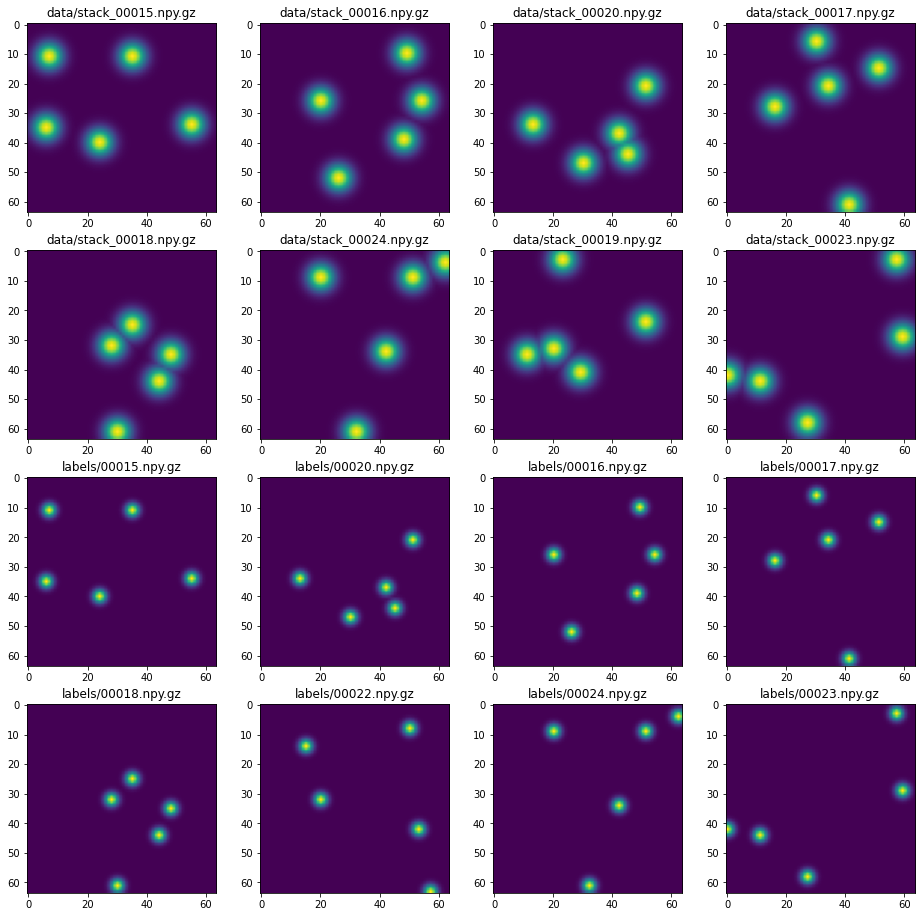

In [3]:
from train import Model
M = Model('storage', 'config/config.ini')
M.print_img('training')
M.print_img('validation')
M.print_img('evaluation')

In [4]:
history = M.fit_model()

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET
Building model... 

  0%|          | 0/64 [00:00<?, ?it/s]Compiling model... 

Loading data from storage... 

Loading labels from storage... 

100%|██████████| 32/32 [00:00<00:00, 579.10it/s]Defining training data generator... 

Loading data from storage... 

Loading labels from storage... 

Defining validation data generator... 

Fitting model without validation generator... 

Fitting model with data from generator... 

Epoch 1/50

2/2 [==============================] - 7s 4s/step - loss: 0.1355 - mean_squared_error: 0.1355
Epoch 2/50
2/2 [==============================] - 7s 4s/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 3/50
2/2 [==============================] - 7s 4s/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 4/50
2/2 [==============================] - 7s 4s/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 5/50
2/2 [==============================] - 7s 4s/step - loss: 0.0078 - mean_squared_error: 0.0

In [5]:
M._load_from_checkpoint('output/checkpoints')

Building model... 



  1%|          | 97/8192 [00:00<00:08, 966.36it/s]Loading data from storage... 

  1%|          | 48/4096 [00:00<00:08, 475.10it/s]Loading scatterer_positions from storage... 

  1%|          | 51/4096 [00:00<00:08, 503.52it/s]Loading data from storage... 

  1%|          | 51/4096 [00:00<00:07, 508.86it/s]Loading scatterer_positions from storage... 

100%|██████████| 4096/4096 [00:08<00:00, 479.05it/s]


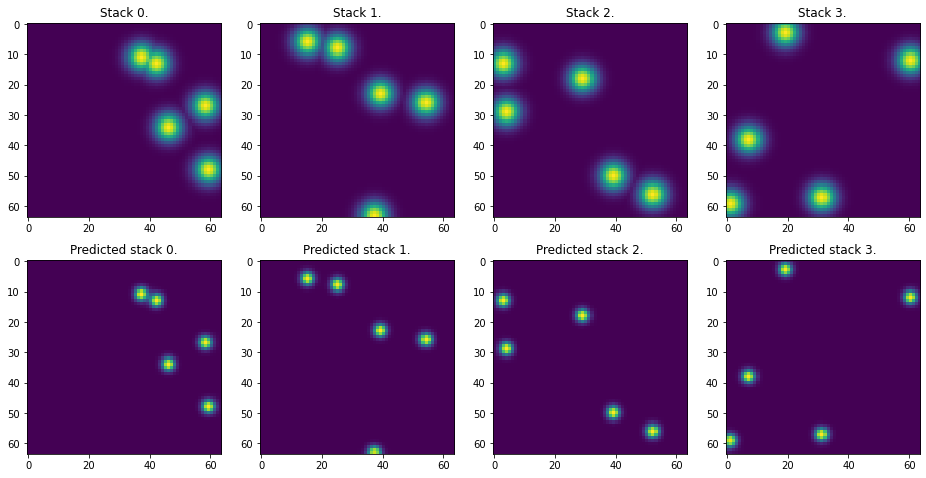

In [6]:
M.compare_predict('training')
M.compare_predict('validation')
M.compare_predict('evaluation')

In [7]:
b, p, s = M.predict('training')
from eval.evaluate import Evaluator as E
ev = E(M.config, p, b, s)

  1%|          | 80/8192 [00:00<00:10, 793.39it/s]Loading data from storage... 

100%|██████████| 8192/8192 [00:08<00:00, 946.70it/s]


In [8]:
msk, corr, acc = ev.evaluate()

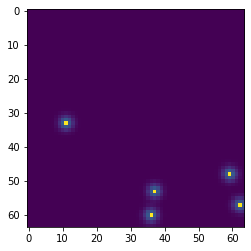

In [9]:
import matplotlib.pyplot as plt
plt.imshow(corr[0,:,:])
#plt.savefig('output/center.png')

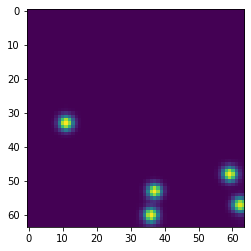

In [10]:
plt.imshow(p[0,:,:])
#plt.savefig('output/pred.png')

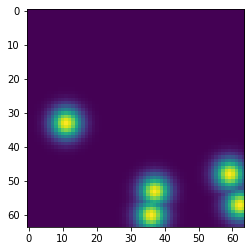

In [11]:
plt.imshow(b[0,:,:])
#plt.savefig('output/data.png')

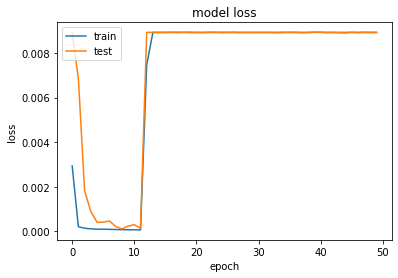

In [12]:
M.illustrate_history(history)

In [13]:
acc

0.95625